## ACTIVIDAD 1
En el archivo world_fires_1_day.csv, encontrarás información sobre incendios en diferentes partes del mundo, incluyendo la latitud, longitud e intensidad de cada incendio. 
Utilizando el trabajo de procesamiento de datos y el trabajo de creación de mapas, elabora un mapa en el que se muestren las diferentes partes del mundo afectadas por los incendios.


In [ ]:
from pathlib import Path
import csv
import plotly.express as px

path = Path('./datos/world_fires_1_day.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# extraemos la latitud, la longitud, y la intensidad
lats, longs, brights = [], [], []
for linea in reader:
    try:
        lat = float(linea[0])
        long = float(linea[1])
        bright = float(linea[2])
    except ValueError:
        print(f'Dato inválido para fecha: {row[5]}')
    else:
        lats.append(lat)
        longs.append(long)
        brights.append(bright)

# Ploteamos el mapa con las intensidades
titulo = 'Actividad Global de Incendios'
fig = px.scatter_geo(lat=lats, lon=longs, size=brights, title=titulo,
                     color=brights,
                     color_continuous_scale='YlOrRd',
                     labels={'color' : 'Intensidad'},
                     projection = 'natural earth',
                    )
fig.show()


## ACTIVIDAD 2
Sitka es una ciudad de Alaska (USA), ubicada en una región boscosa de clima templado, donde recibe una importante cantidad de precipitaciones. En el archivo sitka_weather_2021_full.csv encontrarás la información necesaria para poder representar las cantidades de lluvia diarias. Haz una visualización centrándote en estos datos: fecha y precipitación.


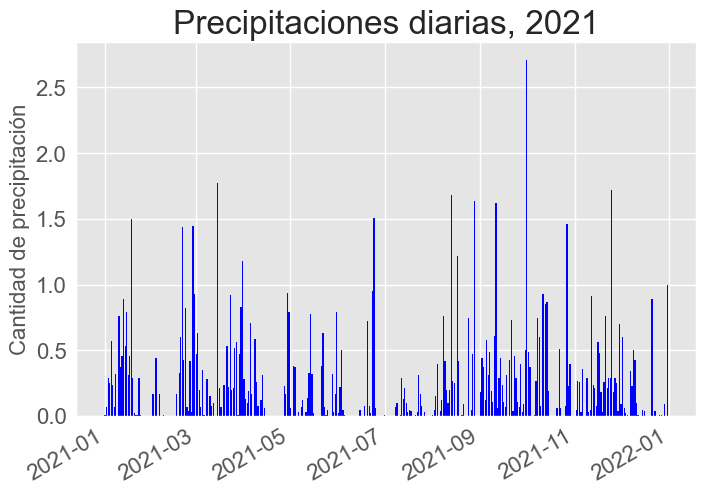

In [8]:
from pathlib import Path
import csv
from datetime import datetime
import matplotlib.pyplot as plt

path = Path('./datos/sitka_weather_2021_full.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# extraemos las fechas y las cantidades de precipitación
dates, precips = [], []
for row in reader:
    try:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        precip = float(row[5])
    except ValueError:
        print(f'Dato inválido para fecha: {row[2]}')
    else:
        dates.append(current_date)
        precips.append(precip)

# Ploteamos las fechas y las cantidades de precipitación
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(dates, precips, color='blue')

ax.set_title('Precipitaciones diarias, 2021', fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel('Cantidad de precipitación', fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

## ACTIVIDAD 3
Traza los primeros 5000 números cúbicos y aplica un mapa de color en el trazado de los cúbicos.


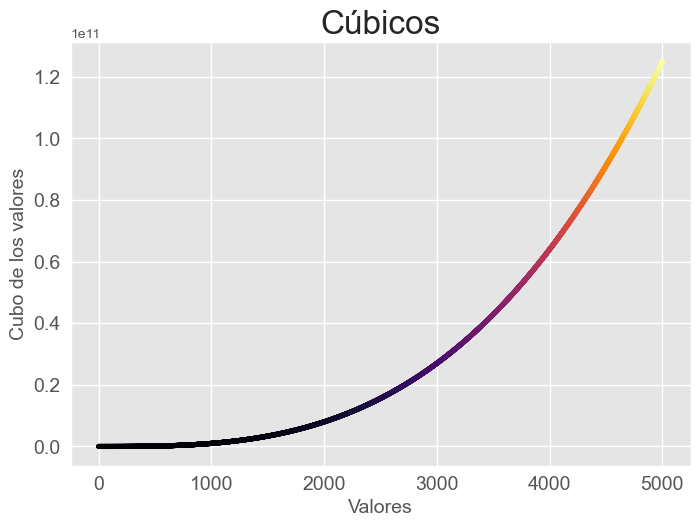

In [10]:
import matplotlib.pyplot as plt

# definir los datos
x_values = range(1, 5001)
y_values = [x**3 for x in x_values]

# trazamos el ploteo
plt.style.use('ggplot')
fig, ax, = plt.subplots()
ax.scatter(x_values, y_values, c=y_values, cmap=plt.cm.inferno, s=10)

# establecemos parámetros de ploteo
ax.set_title('Cúbicos', fontsize=24)
ax.set_xlabel('Valores', fontsize=14)
ax.set_ylabel('Cubo de los valores', fontsize=14)
ax.tick_params(axis='both', labelsize=14)

plt.show()


## ACTIVIDAD 4
Crea un array de 20 números aleatorios enteros entre 1 y 50. Realiza las siguientes operaciones:
-	Crear un array boolean que indique si los elementos son mayores de 25.
-	Utiliza este array boolean para filtrar los elementos mayores de 25.
-	Reemplaza los elementos menores o iguales a 25 por 0.


In [11]:
import numpy as np

# crear un array de 20 números aleatorios enteros entre 1 y 50
array = np.random.randint(1, 51, size=20)

# crear un array booleano que indique si los elementos son mayores de 25
array_booleano = array > 25

# filtrar los elementos mayores de 25
elementos_mayores_25 = array[array_booleano]

# reemplazar los elementos menores o iguales a 25 por 0
array_modificado = np.where(array > 25, array, 0)

# salidas
print(f'Array original: {array}')
print(f'Array booleano: {array_booleano}')
print(f'Elementos mayores de 25: {elementos_mayores_25}')
print(f'Array modificado: {array_modificado}')

Array original: [18  3 31 28  8 43  1 27 13  4 24 30 18 46 36  7 50  5 14 40]
Array booleano: [False False  True  True False  True False  True False False False  True
 False  True  True False  True False False  True]
Elementos mayores de 25: [31 28 43 27 30 46 36 50 40]
Array modificado: [ 0  0 31 28  0 43  0 27  0  0  0 30  0 46 36  0 50  0  0 40]


## ACTIVIDAD 5
Tenemos una empresa que realiza un seguimiento de las ventas de sus productos en diferentes tiendas a lo largo de varios meses. 
La empresa quiere almacenar esta información en un array de 3 dimensiones, donde:
-	La primera dimensión representa los meses (enero, febrero y marzo).
-	La segunda dimensión representa las tiendas (tienda1, tienda2 y tienda3)
-	La tercera dimensión representa los productos (producto A, producto B)
Realiza las siguientes actividades:
-	Crea el array 3D necesaria.
-	Calcula las ventas de cada producto en cada mes.
-	Determina qué tienda tuvo las mayores ventas totales en el mes de febrero
-	Para realizar los cálculos, tenemos dos funciones de la biblioteca numpy:
•	sum() para realizar el sumatorio.
•	argmax() nos devuelve el índice del valor máximo de un array.
•	A ambas funciones le podemos añadir el argumento axis = n, donde n hace referencia al eje del array donde realizaremos las operaciones. En nuestro caso:
	0 en el primer eje
	1 en el segundo eje
	2 en el tercer eje


In [21]:
import numpy as np

# creamos un array 3D de muestra
# ventas = np.array([
#     [
#         [120,150], # Enero, tienda1, producto A, producto B
#         [80,90], # Enero, tienda2, producto A, producto B
#         [100,110] # Enero, tienda3, producto A, producto B
#     ],
#     [
#         [130,160], # Febrero, tienda1, producto A, producto B
#         [85,95], # Febrero, tienda2, producto A, producto B
#         [105,115] # Febrero, tienda3, producto A, producto B
#     ],
#     [
#         [140,170], # Marzo, tienda1, producto A, producto B
#         [90,100], # Marzo, tienda2, producto A, producto B
#         [110,120] # Marzo, tienda3, producto A, producto B
#     ]
# ])
# array de producción
ventas = np.random.randint(1,200,(18)).reshape(3,3,2)
print(ventas)

# 1. Calcular las ventas totales de cada producto en cada mes
ventas_totales_por_mes = np.sum(ventas, axis=1)
print('Ventas totales por mes (Producto A y Producto B):')
# print(ventas_totales_por_mes)
for i, (total_A, total_B) in enumerate(ventas_totales_por_mes, start=1):
    print(f'Mes {i} | Producto A = {total_A} | Producto B = {total_B}')

# 2. Determinar qué tienda tuvo las mayores ventas totales en febrero
ventas_febrero = np.sum(ventas[1], axis=1)
print('Ventas totales por tienda, mes de febrero: ')
for i, total_tienda in enumerate(ventas_febrero, start=1):
    print(f'Tienda {i} | Total ventas febrero: {total_tienda}')
tienda_con_mayor_venta = np.argmax(ventas_febrero) + 1
print(f'La tienda con mayores ventas totales en febrero es: Tienda {tienda_con_mayor_venta}')

[[[ 66 131]
  [122 173]
  [ 89 158]]

 [[197  65]
  [115  53]
  [ 53 121]]

 [[ 62 166]
  [ 71 111]
  [ 14  87]]]
Ventas totales por mes (Producto A y Producto B):
Mes 1 | Producto A = 277 | Producto B = 462
Mes 2 | Producto A = 365 | Producto B = 239
Mes 3 | Producto A = 147 | Producto B = 364
Ventas totales por tienda, mes de febrero: 
Tienda 1 | Total ventas febrero: 262
Tienda 2 | Total ventas febrero: 168
Tienda 3 | Total ventas febrero: 174
La tienda con mayores ventas totales en febrero es: Tienda 1
